In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Data

In [5]:
df = pd.read_csv("../../Datasets/air_qual_preprocessed.csv", index_col='Date_Time', parse_dates=['Date_Time'])
df.head()

,CO_sensor,RH,week,day_of_week,day,is_weekend,CO_sensor_lag_1,RH_lag_1,CO_sensor_lag_24,RH_lag_24,CO_sensor_window,RH_window,month_sin,month_cos,hour_sin,hour_cos
Date_Time,,,,,,,,,,,,,,,,
2004-04-05 00:00:00,1065.0,65.8,15,0,5,0,1188.0,60.8,1224.0,56.5,1165.666667,58.566667,0.866025,-0.5,0.000000,1.000000
2004-04-05 01:00:00,999.0,79.2,15,0,5,0,1065.0,65.8,1215.0,59.2,1149.666667,61.800000,0.866025,-0.5,0.269797,0.962917
2004-04-05 02:00:00,911.0,80.0,15,0,5,0,999.0,79.2,1115.0,62.4,1084.000000,68.600000,0.866025,-0.5,0.519584,0.854419
2004-04-05 03:00:00,873.0,81.0,15,0,5,0,911.0,80.0,1124.0,65.0,991.666667,75.000000,0.866025,-0.5,0.730836,0.682553
2004-04-05 04:00:00,881.0,81.0,15,0,5,0,873.0,81.0,1028.0,65.3,927.666667,80.066667,0.866025,-0.5,0.887885,0.460065


In [8]:
y = df.pop('CO_sensor')

df.columns

Index(['RH', 'week', 'day_of_week', 'day', 'is_weekend', 'CO_sensor_lag_1',
       'RH_lag_1', 'CO_sensor_lag_24', 'RH_lag_24', 'CO_sensor_window',
       'RH_window', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.07, shuffle=False)

In [23]:
print('test data -- start:',x_test.index.min(),'test data -- end :',x_test.index.max())

test data -- start: 2005-03-04 10:00:00 test data -- end : 2005-04-04 14:00:00


## Benchmark

In [26]:
# lets predict for test set
# simple prediction
# 1 -- predict previous value
# 2 -- predict the mean of last window


y_pred_1 = x_test['CO_sensor_lag_1']
y_pred_2 = x_test['CO_sensor_window']


# Lets check the metrics

print('Model  using : lag 1 as prediction')
print('Mean Absolute error', mean_absolute_error(y_test, y_pred_1))
print('Mean Squared error', mean_squared_error(y_test, y_pred_1))


print('\nModel  using : rolling window as prediction')
print('Mean Absolute error', mean_absolute_error(y_test, y_pred_2))
print('Mean Squared error', mean_squared_error(y_test, y_pred_2))

Model  using : lag 1 as prediction
Mean Absolute error 78.87628865979381
Mean Squared error 12534.880412371134

Model  using : rolling window as prediction
Mean Absolute error 119.17457044673539
Mean Squared error 25234.472164948453


## Random Forest Regressor

In [28]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared error', mean_squared_error(y_test, y_pred_rf))

Mean Absolute error 60.98960824742268
Mean Squared error 7067.679358350516


## Linear Regression

In [29]:


lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared error', mean_squared_error(y_test, y_pred_lr))

Mean Absolute error 63.161060334429074
Mean Squared error 8311.325793779202


## Lasso

In [31]:

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared error', mean_squared_error(y_test, y_pred_lasso))

Mean Absolute error 63.09913750764648
Mean Squared error 8402.176946263446


## LassoCV

In [42]:
lasso_cv = LassoCV()
lasso_cv.fit(x_train, y_train)
y_pred_lasso_cv = lasso_cv.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_lasso_cv))
print('Mean Squared error', mean_squared_error(y_test, y_pred_lasso_cv))

Mean Absolute error 67.0656582886228
Mean Squared error 9209.440492253367


In [46]:
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
lasso_cv.fit(x_train, y_train)
y_pred_lasso_cv = lasso_cv.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_lasso_cv))
print('Mean Squared error', mean_squared_error(y_test, y_pred_lasso_cv))

Mean Absolute error 63.24806385178577
Mean Squared error 8350.962441332445


# LassoLarsCV

In [45]:
lasso_lars = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV(normalize=False))

lasso_lars.fit(x_train, y_train)
y_pred_lasso_lars = lasso_lars.predict(x_test)

print('Mean Absolute error', mean_absolute_error(y_test, y_pred_lasso_lars))
print('Mean Squared error', mean_squared_error(y_test, y_pred_lasso_lars))

Mean Absolute error 63.24052052372494
Mean Squared error 8348.330227516306


## Feature importance - Random forest

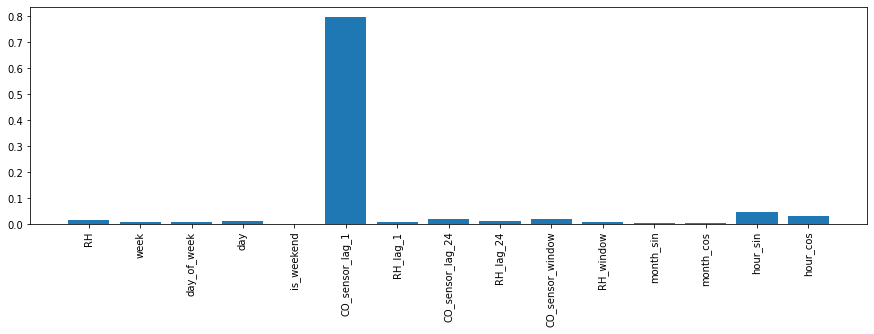

In [55]:
plt.figure(figsize=(15,4))
plt.bar(x_test.columns,rf.feature_importances_)
plt.xticks(rotation=90);

## Feature Importance Linear Regression

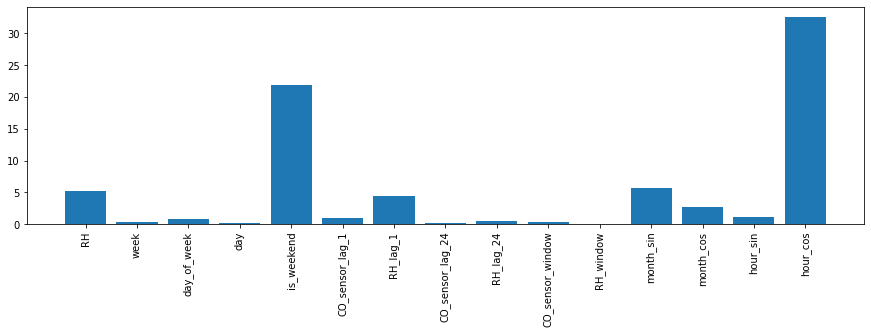

In [58]:
plt.figure(figsize=(15,4))
plt.bar(x_test.columns, np.abs(lr.coef_))
plt.xticks(rotation=90);

## Feature Importance Lasso

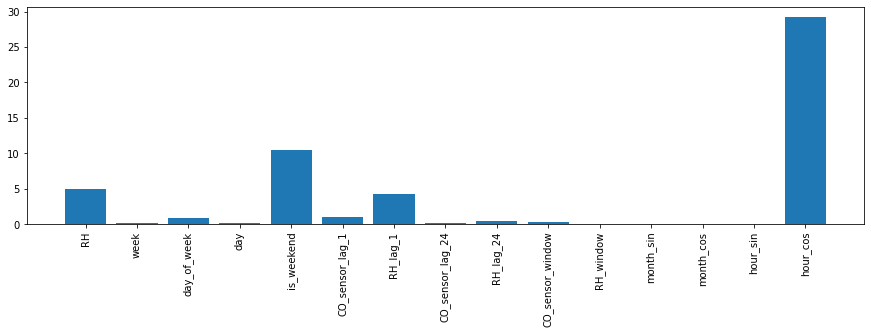

In [59]:
plt.figure(figsize=(15,4))
plt.bar(x_test.columns, np.abs(lasso.coef_))
plt.xticks(rotation=90);